In [1]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy
import warnings
warnings.filterwarnings('ignore')
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline


c:\anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [105]:
file_list = ['groups_02.csv','groups_04.csv','groups_05.csv']

file1 = pd.read_csv(file_list[2])
t = file1.drop_duplicates(['meetup_0_description'], keep='last')
t = t[['meetup_0_category_name','meetup_0_description']]


In [106]:
t.head()

,meetup_0_category_name,meetup_0_description
1,Movements & Politics,<p><span>A club for for men* who believe in th...
6,Movements & Politics,<p>Come to a local Libertarian Meetup organize...
7,Movements & Politics,"<p style=""text-align : left""><span style=""font..."
9,Movements & Politics,<p>We're a social organization dedicated to he...
10,Movements & Politics,<p>The object of this Meetup is to have modera...


In [107]:
import re
from bs4 import BeautifulSoup
def cleanhtml(raw_html):
    text = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', raw_html)
    cleantext = BeautifulSoup(text, "lxml").text
    clean= BeautifulSoup(cleantext, "html.parser").text
    clean = clean.replace('\xa0',' ') 
    return clean


In [108]:
col_names =  [ 'meetup_0_description']
my_df  = pd.DataFrame(columns = col_names)
clean = []
for index, row in t.iterrows():
    try:
        text = row['meetup_0_description'] 
        my_df.loc[index] = cleanhtml(text)
        clean.append(cleanhtml(text))
    except TypeError:
        print('error')
        continue

error


In [109]:
my_df.to_csv('group_2.csv')

In [130]:
df=pd.read_excel('group_0.xlsx')
df

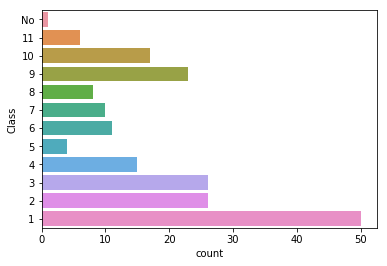

In [131]:
import seaborn as sns
sns.countplot(y="Class",data=df)

'We are open to everyone. If you are press, please identify yourself before the meeting begins. Also, we don’t allow any recording devices at the meetings, and if you want to quote someone you need their explicit permission for each quote.\n'